In [2]:
from arraylake import Client, config
config.set({"s3.anon": True})

client = Client()
repo = client.get_repo("earthmover-public/cesm2-lens")
repo

<arraylake.repos.v1.Repo 'earthmover-public/cesm2-lens'>

In [3]:
ds = repo.to_xarray("atm/daily/cesm2LE-ssp370-cmip6-TS", chunks={})
ds

<xarray.Dataset> Size: 347GB
Dimensions:    (member_id: 50, time: 31390, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 251kB 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    time_bnds  (time, nbnd) object 502kB dask.array<chunksize=(15695, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    TS         (member_id, time, lat, lon) float32 347GB dask.array<chunksize=(1, 730, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    host:              mom1
    logname:           sunseon
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    source:            CAM
    time_period_freq:  day_1
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...

In [4]:
threshold = 17 + 273.15

hdd = (ds.TS < threshold).resample(time="YS").sum()
hdd

<xarray.DataArray 'TS' (member_id: 50, time: 86, lat: 192, lon: 288)> Size: 2GB
dask.array<transpose, shape=(50, 86, 192, 288), dtype=float64, chunksize=(1, 2, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 688B 2015-01-01 00:00:00 ... 2100-01-01 00:00:00

In [5]:
hdd.load()

<xarray.DataArray 'TS' (member_id: 50, time: 86, lat: 192, lon: 288)> Size: 2GB
array([[[[365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         ...,
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.]],

        [[365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         ...,
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.]],

        [[365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         ...,
...
         ...,
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.]],

        [[365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         ...,
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.]],

        [[365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         ...,
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.],
         [365., 365., 365., ..., 365., 365., 365.]]]])
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U12 2kB 'r10i1181p1f1' ... 'r9i1301p1f1'
  * time       (time) object 688B 2015-01-01 00:00:00 ... 2100-01-01 00:00:00

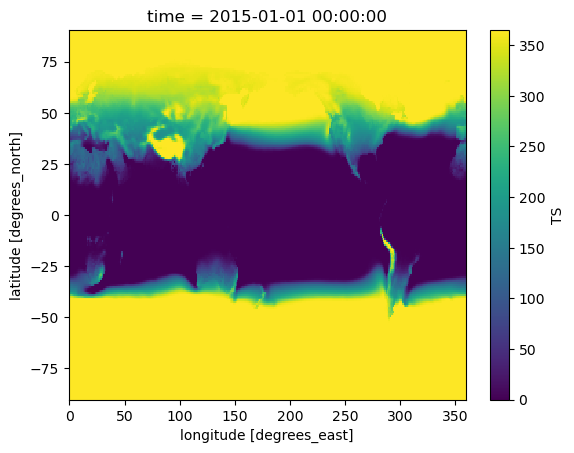

In [6]:
hdd.isel(time=0).mean("member_id").plot()

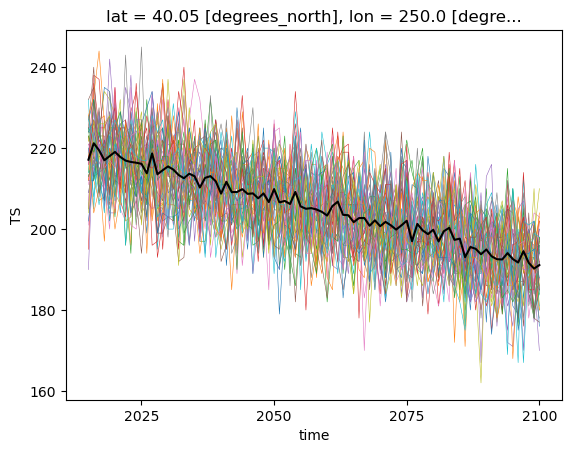

In [7]:
hdd.sel(lon=250, lat=40, method="nearest").plot.line(x="time", hue="member_id", linewidth=0.4, add_legend=False);
hdd.sel(lon=250, lat=40, method="nearest").mean("member_id").plot.line(x="time", color="k", add_legend=False);
